# Linear Models

In [1]:
import  warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set()

## Why normal distributions are normal

### 4.1

In [4]:
pos = np.random.uniform(-1, 1, (16, 1000)).sum(axis=0)

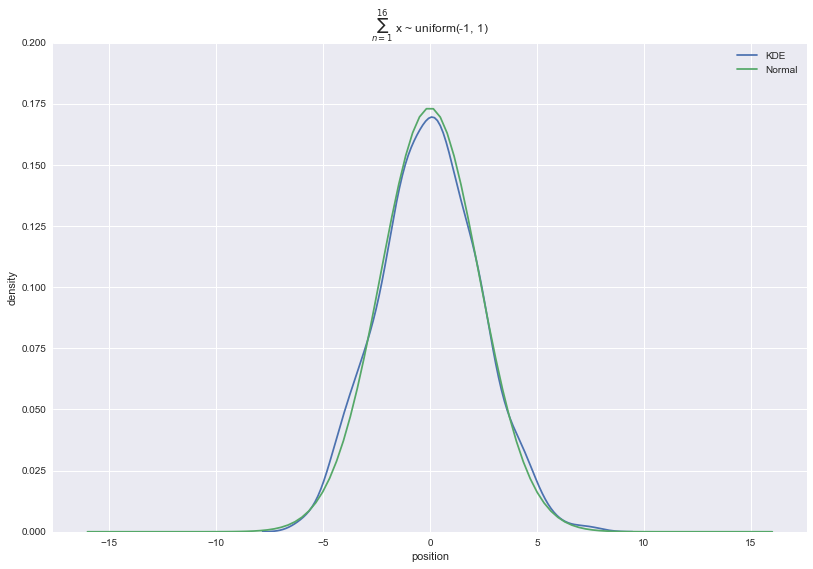

In [5]:
xs = np.linspace(-16, 16, 100)
ys = stats.norm.pdf(xs, loc=np.mean(pos), scale=np.std(pos))
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(pos, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.set_ylim(0, 0.20)
ax.legend(loc=0)
ax.set_title("$\sum_{n=1}^{16}$ x ~ uniform(-1, 1)", pad=10)
ax.set_xlabel("position")
ax.set_ylabel("density");

### 4.2

In [6]:
(np.random.uniform(1.0, 1.1, 12)).prod()

1.6568076039368047

### 4.3

In [7]:
growth = np.random.uniform(1.0, 1.1, (12, 10000)).prod(axis=0)

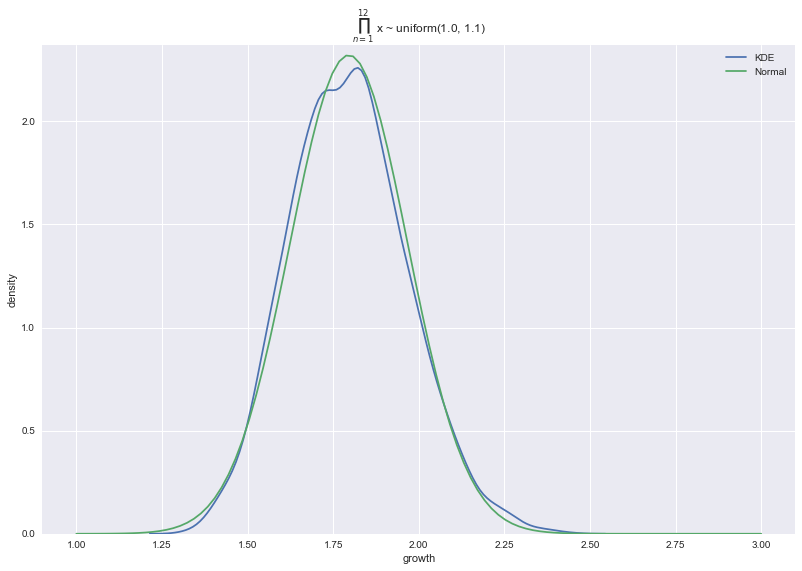

In [8]:
xs = np.linspace(1.0, 3.0, 100)
ys = stats.norm.pdf(xs, loc=np.mean(growth), scale=np.std(growth))

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(growth, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.1)", pad=12)
ax.set_xlabel("growth")
ax.set_ylabel("density");

### 4.4

In [9]:
big = np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0)
small = np.random.uniform(1.0, 1.01, (12, 10000)).prod(axis=0)

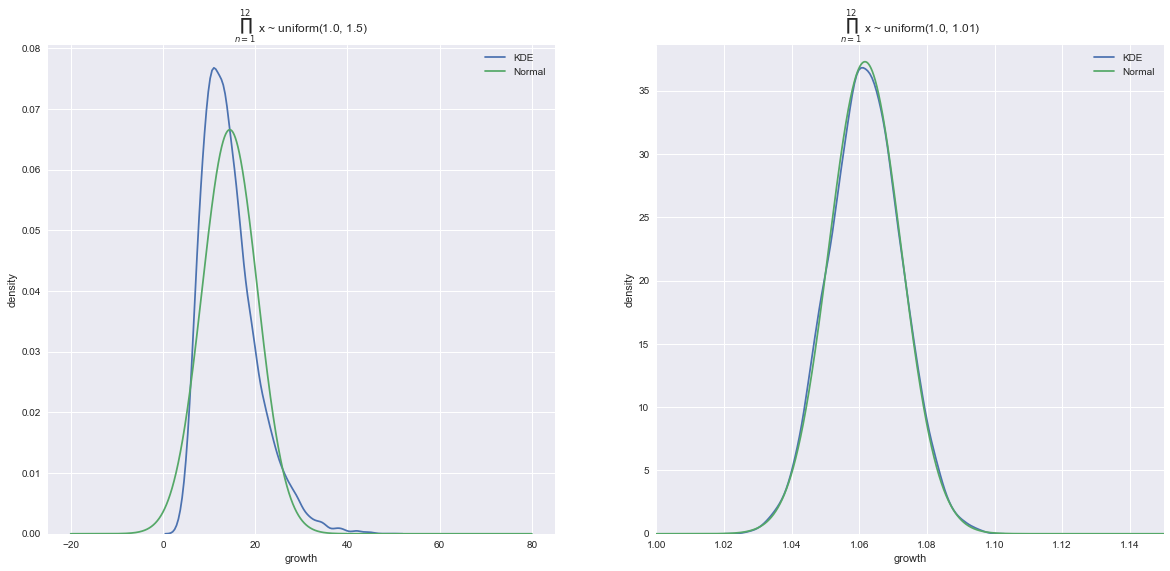

In [10]:
xs_big = np.linspace(-20.0, 80.0, 10000)
ys_big = stats.norm.pdf(xs_big, loc=np.mean(big), scale=np.std(big))
xs_small = np.linspace(1.0, 1.3, 10000)
ys_small = stats.norm.pdf(xs_small, loc=np.mean(small), scale=np.std(small))

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(20, 9)

sns.kdeplot(big, ax=ax1, label="KDE")
ax1.plot(xs_big, ys_big, label="Normal")
ax1.legend(loc=0)
ax1.set_xlabel("growth")
ax1.set_ylabel("density")
ax1.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5)", pad=12)

sns.kdeplot(small, ax=ax2, label="KDE")
ax2.plot(xs_small, ys_small, label="Normal")
ax2.set_xlim(1, 1.15)
ax2.legend(loc=0)
ax2.set_xlabel("growth")
ax2.set_ylabel("density")
ax2.set_title("$\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.01)", pad=12);

### 4.5

In [11]:
log_big = np.log(np.random.uniform(1.0, 1.5, (12, 10000)).prod(axis=0))

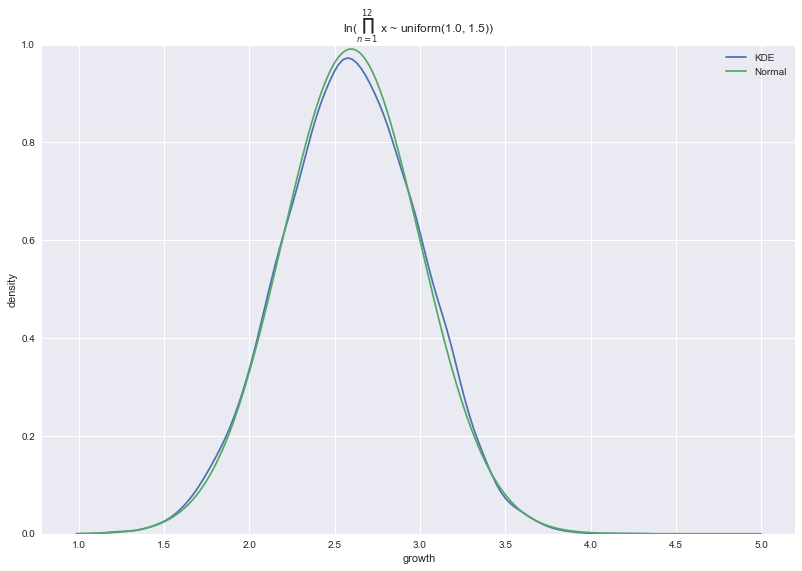

In [12]:
xs = np.linspace(1, 5, 10000)
ys = stats.norm.pdf(xs, loc=np.mean(log_big), scale=np.std(log_big))

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(log_big, ax=ax, label="KDE")
ax.plot(xs, ys, label="Normal")
ax.legend(loc=0)
ax.set_xlabel("growth")
ax.set_ylabel("density")
ax.set_title("ln($\prod_{n=1}^{12}$ x ~ uniform(1.0, 1.5))", pad=12);
ax.set_ylim(0, 1.0);

## A language for describing models

### 4.6

In [13]:
w = 6; n = 9
p_grid = np.linspace(0, 1, 100)
posterior = stats.binom.pmf(w, n, p=p_grid) * stats.uniform.pdf(p_grid, 0, 1)
posterior = posterior/sum(posterior)

## A Gaussian model of height

### 4.7

In [14]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

### 4.8

In [15]:
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### 4.9

In [16]:
d["height"].head()

0    151.765
1    139.700
2    136.525
3    156.845
4    145.415
Name: height, dtype: float64

### 4.10

In [17]:
d2 = d.loc[d["age"] >= 18]

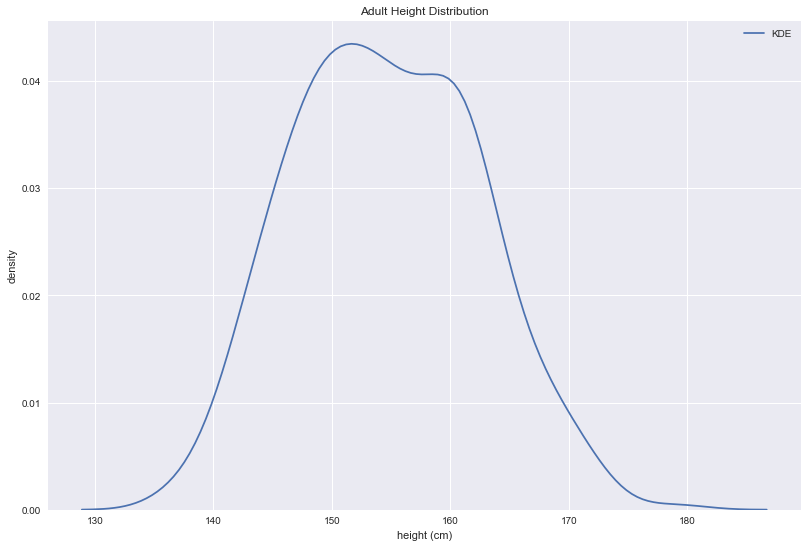

In [18]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(d2["height"], ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Adult Height Distribution");

### 4.11

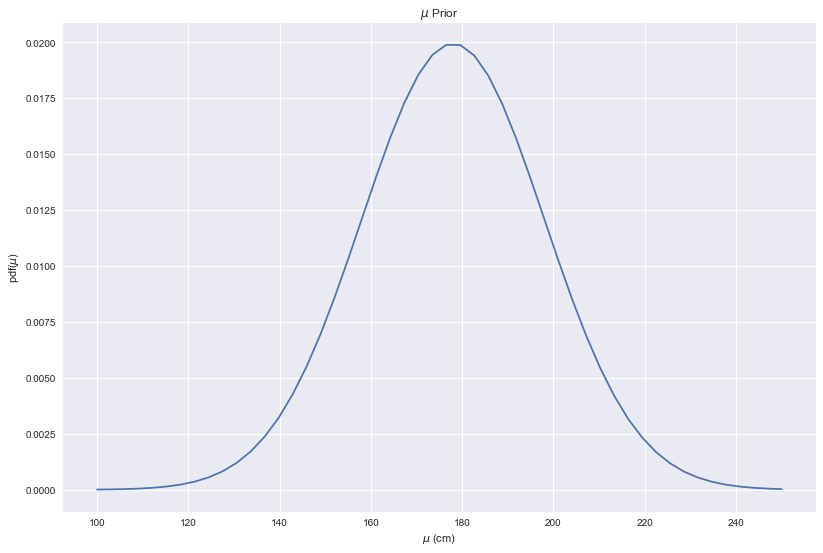

In [19]:
xs = np.linspace(100, 250)
ys = stats.norm.pdf(xs, 178, 20)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(xs, ys)
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("pdf($\mu$)")
ax.set_title("$\mu$ Prior");

### 4.12

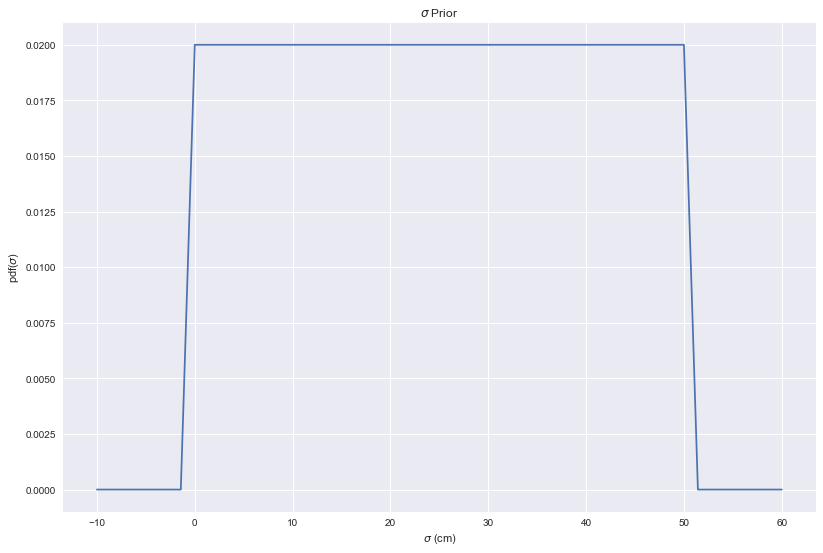

In [20]:
xs = np.linspace(-10, 60)
ys = stats.uniform.pdf(xs, 0, 50)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(xs, ys)
ax.set_xlabel("$\sigma$ (cm)")
ax.set_ylabel("pdf($\sigma$)")
ax.set_title("$\sigma$ Prior");

### 4.13

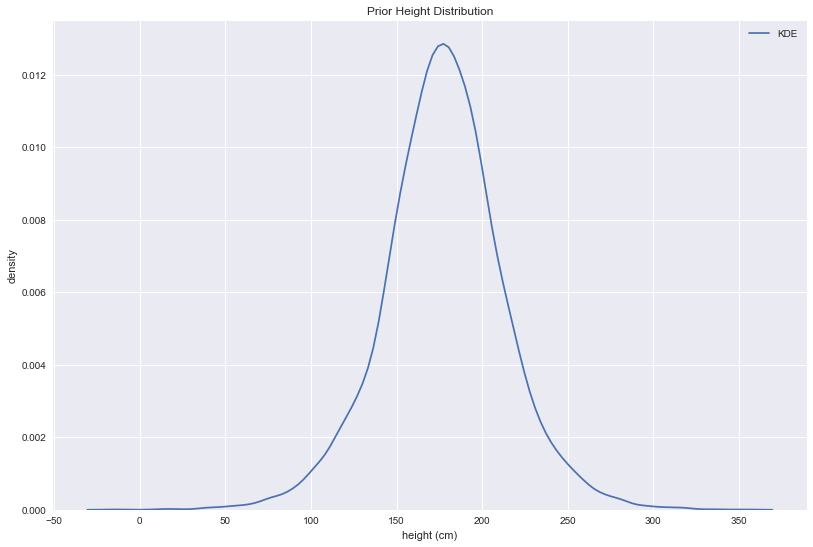

In [21]:
sample_mu = stats.norm.rvs(loc=178, scale=20, size=int(1e4))
sample_sigma = stats.uniform.rvs(loc=0, scale=50, size=int(1e4))
prior_h = stats.norm.rvs(loc=sample_mu, scale=sample_sigma)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(prior_h, ax=ax, label="KDE")
ax.set_xlabel("height (cm)")
ax.set_ylabel("density")
ax.set_title("Prior Height Distribution");

### 4.14

In [22]:
mu_list = np.linspace(140, 160, 200)
sigma_list = np.linspace(4, 9, 200)
(mu_grid, sigma_grid) = np.meshgrid(mu_list, sigma_list)
post_ll = np.sum([stats.norm.logpdf(height, loc=mu_grid, scale=sigma_grid) 
                  for height in d2["height"]], axis=0)
post_prod = post_ll +\
            stats.norm.logpdf(mu_grid, loc=178, scale=20) +\
            stats.uniform.logpdf(sigma_grid, loc=0, scale=50)
post_prob = np.exp(post_prod - np.max(post_prod))
post_prob = post_prob/post_prob.sum()

### 4.15

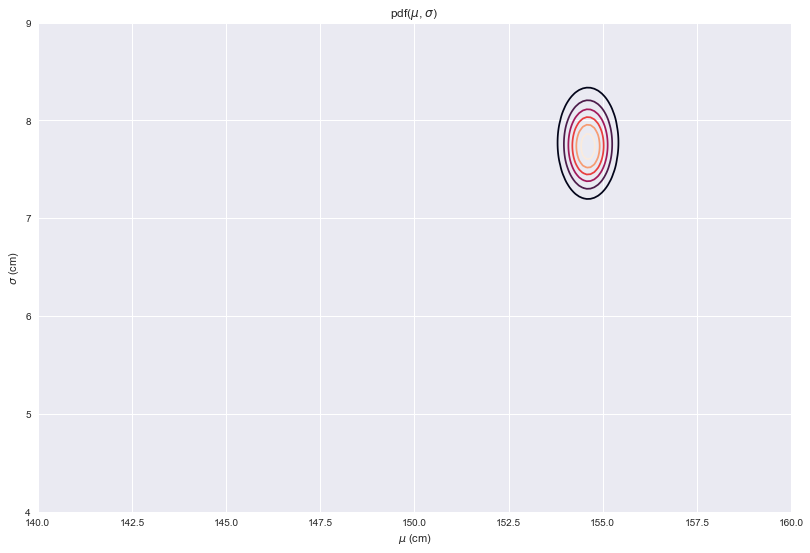

In [23]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.contour(mu_grid, sigma_grid, post_prob);

### 4.16

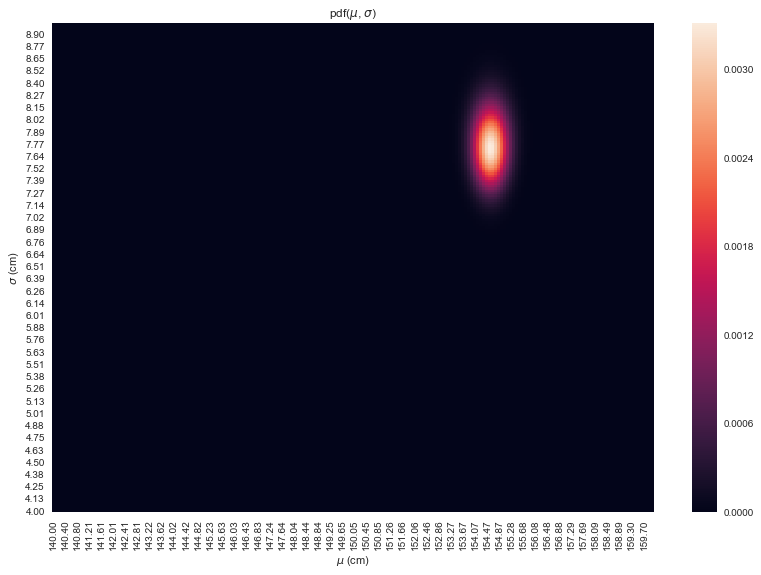

In [24]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
data = pd.DataFrame(post_prob, index=sigma_list, columns=mu_list)
sns.heatmap(data, ax=ax)
ax.set_title("pdf($\mu$, $\sigma$)")
ax.set_xlabel("$\mu$ (cm)")
ax.set_ylabel("$\sigma$ (cm)")
ax.set_xticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_xticklabels()])
ax.set_yticklabels(["{:.2f}".format(float(l.get_text())) for l in ax.get_yticklabels()])
ax.invert_yaxis();

### 4.17

In [25]:
idxs = np.random.choice(np.arange(len(mu_list)*len(sigma_list)),
                        size=int(1e4),
                        p=post_prob.reshape(len(mu_list)*len(sigma_list)))
sample_mu = mu_list[idxs//len(mu_list)]
sample_sigma = sigma_list[np.mod(idxs, len(sigma_list))]

### 4.18

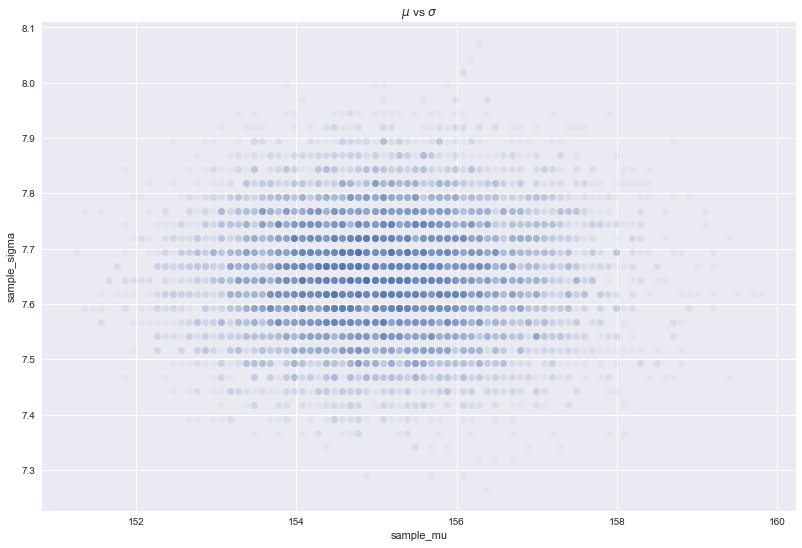

In [26]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(sample_mu, sample_sigma, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.19

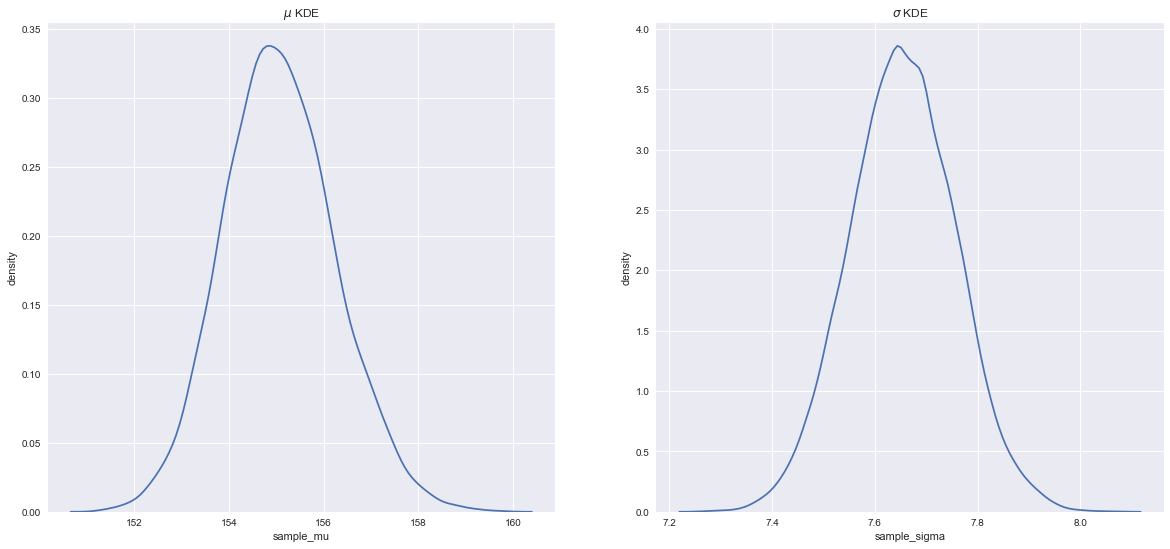

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches(20, 9)
sns.kdeplot(sample_mu, ax=ax1)
sns.kdeplot(sample_sigma, ax=ax2)
ax1.set_xlabel("sample_mu")
ax1.set_ylabel("density")
ax1.set_title("$\mu$ KDE")
ax2.set_xlabel("sample_sigma")
ax2.set_ylabel("density")
ax2.set_title("$\sigma$ KDE");

### 4.20

In [28]:
pm.hpd(sample_mu), pm.hpd(sample_sigma)

(array([152.86432161, 157.38693467]), array([7.41708543, 7.81909548]))

### 4.21

In [29]:
d3 = np.random.choice(d2["height"], 20)

### 4.22

In [30]:
mu_list2 = np.linspace(150, 170, 200)
sigma_list2 = np.linspace(4, 20, 200)
(mu_grid2, sigma_grid2) = np.meshgrid(mu_list2, sigma_list2)
post_ll2 = np.sum([stats.norm.logpdf(height, loc=mu_grid2, scale=sigma_grid2) 
                   for height in d3], axis=0)
post_prod2 = post_ll2 +\
             stats.norm.logpdf(mu_grid2, loc=178, scale=20) +\
             stats.uniform.logpdf(sigma_grid2, loc=0, scale=50)
post_prob2 = np.exp(post_prod2 - np.max(post_prod2))
post_prob2 = post_prob2/post_prob2.sum()

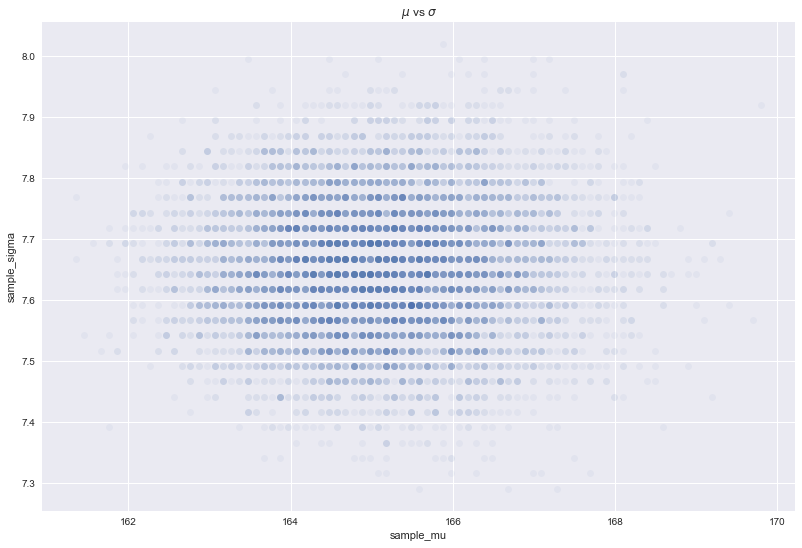

In [31]:
idxs = np.random.choice(np.arange(len(mu_list2)*len(sigma_list2)),
                        size=int(1e4),
                        p=post_prob.reshape(len(mu_list2)*len(sigma_list2)))
sample_mu2 = mu_list2[idxs//len(mu_list2)]
sample_sigma2 = sigma_list[np.mod(idxs, len(sigma_list2))]

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(sample_mu2, sample_sigma2, "o", alpha=0.05)
ax.set_xlabel("sample_mu")
ax.set_ylabel("sample_sigma")
ax.set_title("$\mu$ vs $\sigma$");

### 4.23

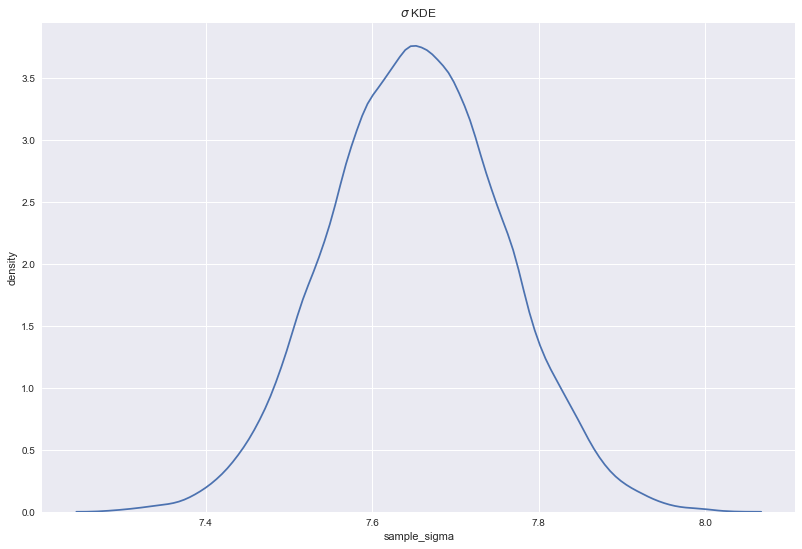

In [32]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(sample_sigma2, ax=ax)
ax.set_xlabel("sample_sigma")
ax.set_ylabel("density")
ax.set_title("$\sigma$ KDE");

### 4.24

In [33]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d["age"] >=18]

### 4.25

In [34]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

### 4.26

Since I'm using the PyMC3's [recommended implementation](https://github.com/pymc-devs/resources/blob/master/Rethinking/Chp_04.ipynb) for this book, I'll follow their lead in switching directly to MCMC.

In [35]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1031.21draws/s]


### 4.27

Since these values are estimated from samples, the values will be slightly different from those given by `find_MAP`

In [36]:
pm.summary(trace_4_1, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.42,0.01,153.90,155.27,2200.03,1.0
sigma,7.77,0.28,0.01,7.32,8.22,2176.21,1.0


### 4.28

In [37]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20, testval=d2["height"].mean())
    sigma = pm.Uniform('sigma', lower=0, upper=50, testval=d2["height"].std())
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])

In [38]:
with m4_1:
    trace_4_1 = pm.sample(1000, tune=1000)

pm.summary(trace_4_1, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1297.50draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.40,0.01,154.01,155.25,2076.26,1.0
sigma,7.77,0.29,0.01,7.31,8.22,2072.82,1.0


### 4.29

In [39]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])
    trace_4_2 = pm.sample(1000, tune=1000)

pm.summary(trace_4_2, alpha=0.11).round(2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:03<00:00, 1247.89draws/s]


,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,177.87,0.10,0.00,177.71,178.02,2076.23,1.0
sigma,24.66,0.96,0.02,23.20,26.20,1958.63,1.0


### 4.30

In [40]:
trace_df = pm.trace_to_dataframe(trace_4_1)
trace_df.cov()

,mu,sigma
mu,0.156673,-0.001477
sigma,-0.001477,0.081766


### 4.31

In [41]:
print(np.diag(trace_df.cov()))
print(trace_df.corr())

[0.15667331 0.08176649]
             mu     sigma
mu     1.000000 -0.013053
sigma -0.013053  1.000000


### 4.32

Increasing the number of samples

In [42]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2["height"])
    trace_4_1 = pm.sample(int(1e4), tune=1000)
    post = pm.trace_to_dataframe(trace_4_1)
    
post.head()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:18<00:00, 1186.00draws/s]


,mu,sigma
0,154.625683,7.505790
1,154.255846,8.040210
2,154.399080,8.221350
3,155.022977,7.529281
4,153.836985,7.947759


### 4.33

In [43]:
pm.summary(trace_4_1, alpha=0.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
mu,154.60,0.41,0.0,153.95,155.26,19822.32,1.0
sigma,7.77,0.29,0.0,7.31,8.24,20752.77,1.0


### 4.34

In [44]:
stats.multivariate_normal.rvs(mean=post.mean(), cov=post.cov(), size=10)

array([[154.35133296,   7.25268917],
       [154.83734288,   7.34862937],
       [154.43682291,   7.17825672],
       [154.31258211,   7.68731078],
       [155.03842691,   7.44900308],
       [154.75524746,   7.87384349],
       [154.473299  ,   8.0573872 ],
       [154.03211073,   8.36496836],
       [154.49100114,   7.93775293],
       [154.10867472,   7.93580826]])

### 4.35

In [45]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sd=20)
    log_sigma = pm.Normal('log_sigma', mu=2, sd=10)
    height = pm.Normal("height", mu=mu, sd=np.exp(log_sigma), observed=d2["height"])

### 4.36

In [46]:
with m4_1_logsigma:
    trace_4_1_logsigma = pm.sample(int(1e4), tune=1000)
    post = pm.trace_to_dataframe(trace_4_1_logsigma)
    sigma = np.exp(post["log_sigma"])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_sigma, mu]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:15<00:00, 1400.18draws/s]


## Adding a Predictor

### 4.37

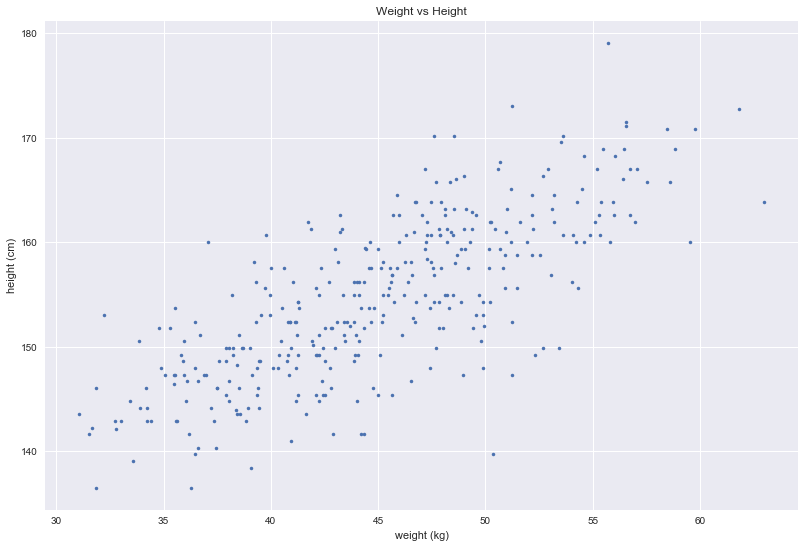

In [47]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], ".")
ax.set_xlabel("weight (kg)")
ax.set_ylabel("height (cm)")
ax.set_title("Weight vs Height");

### 4.38 - 4.39

In [48]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d.loc[d["age"] >= 18]

with pm.Model() as m4_3:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*d2["weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2["height"])
    trace_4_3 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [01:09<00:00, 317.67draws/s]


### 4.40

In [49]:
pm.summary(trace_4_3, alpha=.11).round(2)

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat
b,0.9,0.04,0.00,0.84,0.97,8167.13,1.0
a,113.9,1.91,0.02,110.86,116.93,8215.67,1.0
sigma,5.1,0.19,0.00,4.78,5.40,9713.87,1.0


### 4.41

In [50]:
trace_df = pm.trace_to_dataframe(trace_4_3)
trace_df.corr().round(2)

,b,a,sigma
b,1.00,-0.99,-0.0
a,-0.99,1.00,0.0
sigma,-0.00,0.00,1.0


### 4.42

In [51]:
d2 = d2.assign(weight_c=d2["weight"] - d2["weight"].mean())

### 4.43

In [52]:
with pm.Model() as m4_4:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*d2["weight_c"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2["height"])
    trace_4_4 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:21<00:00, 1000.67draws/s]


### 4.44

In [53]:
trace_df = pm.trace_to_dataframe(trace_4_4)
(pm.summary(trace_4_4, alpha=.11)
 .join(trace_df.corr())
 .round())

,mean,sd,mc_error,hpd_5.5,hpd_94.5,n_eff,Rhat,b,a,sigma
b,1.0,0.0,0.0,1.0,1.0,31301.0,1.0,1.0,0.0,-0.0
a,155.0,0.0,0.0,154.0,155.0,28920.0,1.0,0.0,1.0,0.0
sigma,5.0,0.0,0.0,5.0,5.0,28145.0,1.0,-0.0,0.0,1.0


### 4.45

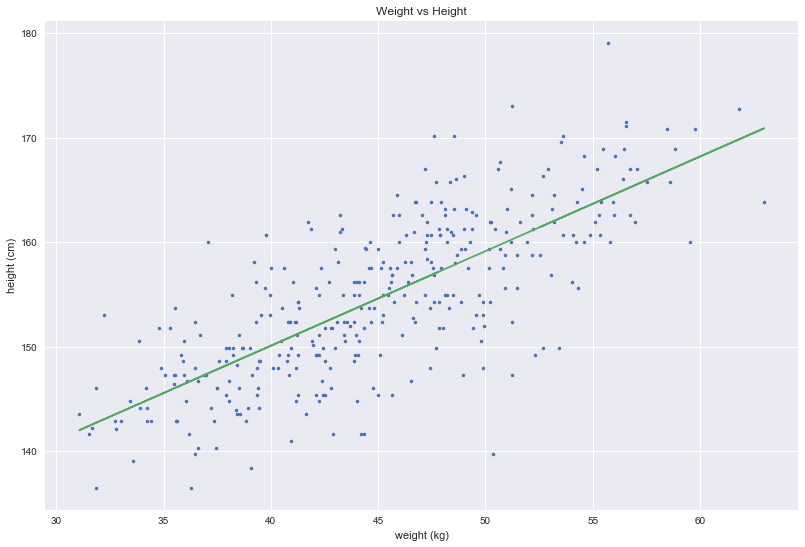

In [54]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], ".")
ax.plot(d2["weight"], trace_4_3["a"].mean() + d2["weight"]*trace_4_3["b"].mean())
ax.set_xlabel("weight (kg)")
ax.set_ylabel("height (cm)")
ax.set_title("Weight vs Height");

### 4.46

In [55]:
post = pm.trace_to_dataframe(trace_4_3)

### 4.47

In [56]:
post[:5]

,b,a,sigma
0,0.844832,116.045508,5.017425
1,0.878191,115.828670,5.406143
2,0.886624,114.204867,4.851954
3,0.888339,114.952257,5.102677
4,0.867067,115.197387,5.141986


### 4.48

In [57]:
N = 10
dN = d2[:N]

with pm.Model() as mN:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*dN["weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=dN["height"])
    trace_N = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:48<00:00, 451.57draws/s]
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


### 4.49

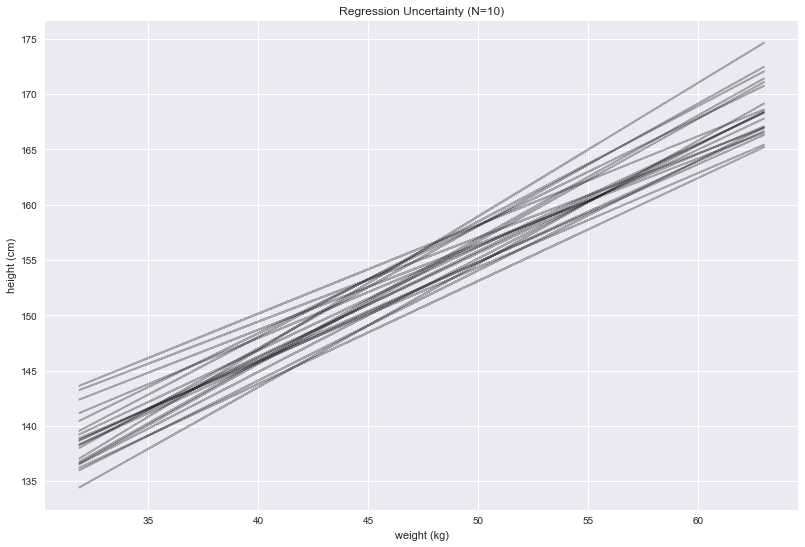

In [58]:
post = pm.trace_to_dataframe(trace_N)[:20]

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.set_xlabel("weight (kg)")
ax.set_ylabel("height (cm)")
ax.set_title("Regression Uncertainty (N=10)");

for i in range(len(post)):
    ax.plot(dN["weight"], post["a"].iloc[i] + dN["weight"]*post["b"].iloc[i], alpha=0.3, color="black");

### 4.50

In [59]:
N = 352
dN = d2[:N]

with pm.Model() as mN:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = a + b*dN["weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=dN["height"])
    trace_N = pm.sample(int(1e4), tune=1000)
    
post = pm.trace_to_dataframe(trace_N)[:20]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:44<00:00, 321.78draws/s]


In [60]:
mu_at_50 = post["a"] + post["b"] * 50

### 4.51

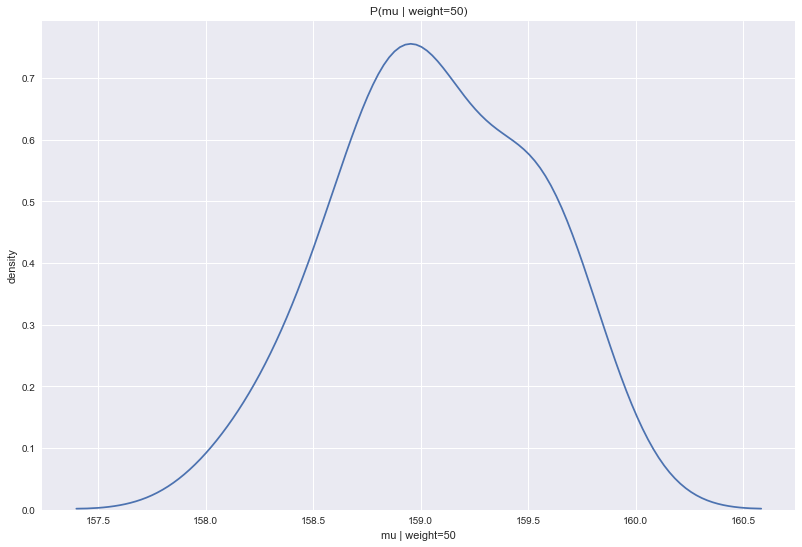

In [61]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(mu_at_50, ax=ax)
ax.set_xlabel("mu | weight=50")
ax.set_ylabel("density")
ax.set_title("P(mu | weight=50)");

### 4.52

In [62]:
pm.hpd(mu_at_50, alpha=0.11)

array([158.48689975, 159.61758567])

### 4.53

I need to add `mu` as an explicitly calculated deterministic variable to the model in order to get samples around the height data

In [63]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d.loc[d["age"] >= 18]

with pm.Model() as m4_3:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=156, sd=100)
    mu = pm.Deterministic("mu", a + b*d2["weight"])
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2["height"])
    trace_4_3 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:40<00:00, 540.13draws/s]


In [64]:
mu = pm.trace_to_dataframe(trace_4_3).filter(regex="mu\_*")
mu.head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,mu__342,mu__343,mu__344,mu__345,mu__346,mu__347,mu__348,mu__349,mu__350,mu__351
0,157.367119,146.579143,142.183042,162.329588,151.137062,171.796037,148.251279,164.649003,145.041856,163.705055,...,153.753147,157.421059,149.357046,150.921303,150.705543,156.611960,144.448517,161.493520,163.300506,161.844129
1,157.492364,147.430882,143.330829,162.120646,151.681859,170.949597,148.990412,164.283865,145.997121,163.403485,...,154.121768,157.542672,150.021714,151.480629,151.279399,156.788061,145.443740,161.340881,163.026179,161.667879
2,157.778044,147.371775,143.131221,162.564927,151.768423,171.696428,148.984747,164.802275,145.888882,163.891726,...,154.291944,157.830075,150.051389,151.560298,151.352173,157.049605,145.316537,161.758441,163.501491,162.096645
3,156.785898,146.958413,142.953713,161.306541,151.110525,169.930159,148.481673,163.419450,145.557996,162.559545,...,153.493690,156.835035,149.488990,150.913976,150.717426,156.097974,145.017485,160.544911,162.191015,160.864304
4,156.918472,146.432560,142.159550,161.741992,150.862858,170.943380,148.057876,163.996463,144.938317,163.078946,...,153.405691,156.970902,149.132682,150.653139,150.443421,156.184458,144.361592,160.929334,162.685724,161.270126


### 4.54

In [65]:
weight_seq = np.arange(25, 71)
num_samples = len(trace_4_3) * trace_4_3.nchains
mu = trace_4_3["a"].reshape(num_samples, 1) +\
     np.multiply(trace_4_3["b"].reshape(num_samples, 1),
                 weight_seq)
mu.shape

(20000, 46)

### 4.55

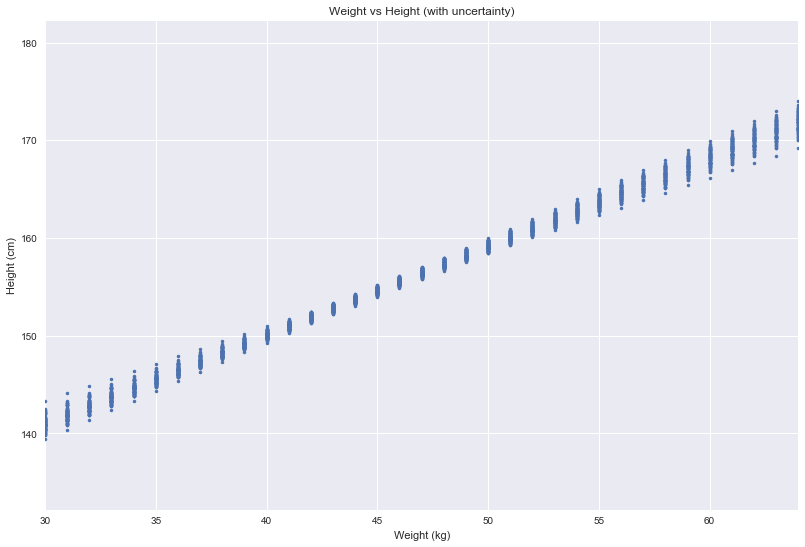

In [66]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(weight_seq, mu[:100].T, "C0.")
ax.set_title("Weight vs Height (with uncertainty)")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(30, 64);

### 4.56

In [67]:
mu_mean = mu.mean(axis=0)
mu_hpdi = pm.hpd(mu, alpha=.11)

### 4.57

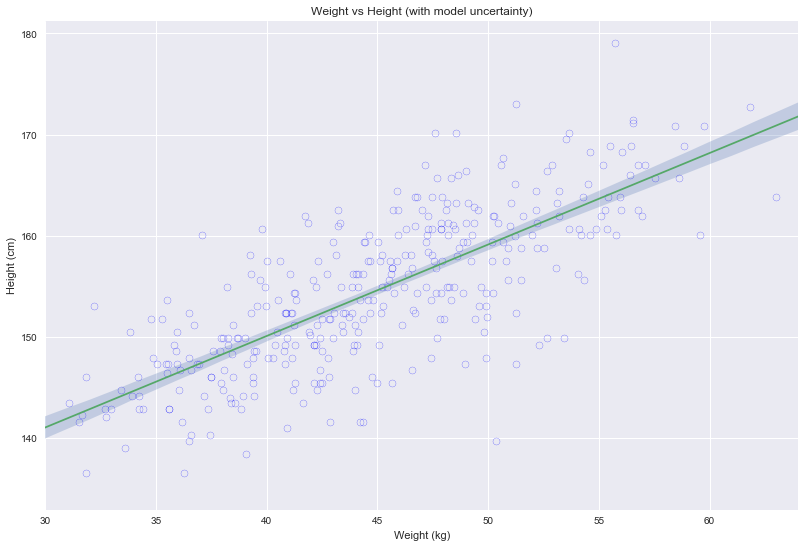

In [68]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.25)
ax.set_title("Weight vs Height (with model uncertainty)")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(30, 64);

### 4.58

Since I implemented this manually earlier, the code is the same as in [4.58](#4.54)

### 4.59

In [69]:
sigma = (trace_4_3["sigma"]
         .repeat(len(weight_seq))
         .reshape(len(weight_seq), num_samples)
         .T)
sim_height = stats.norm.rvs(loc=mu, scale=sigma)
sim_height.shape

(20000, 46)

### 4.60

In [70]:
height_pi = pm.hpd(sim_height, alpha=0.11)

### 4.61

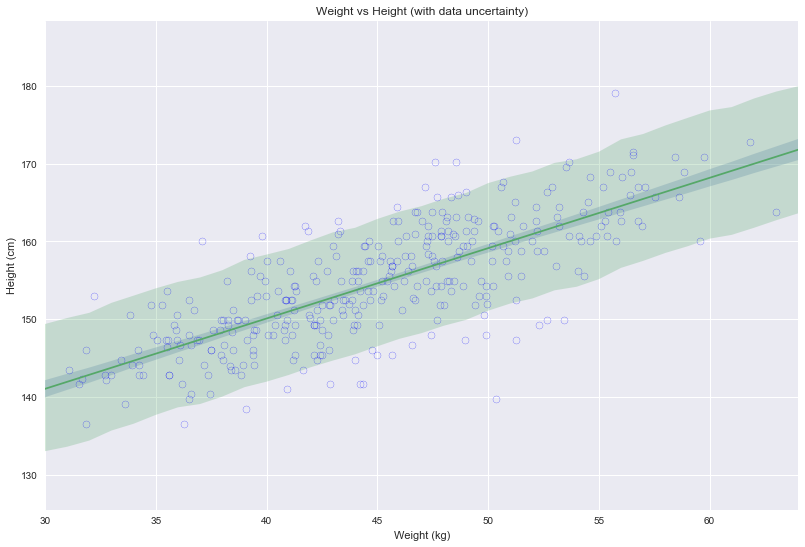

In [71]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d2["weight"], d2["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_hpdi[:,0], mu_hpdi[:,1], alpha=0.25);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight vs Height (with data uncertainty)")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(30, 64);

### 4.62

Since `trace_4_3` already has 10k samples, and `pm.sample_ppc` defaults to the length of the trace, this has already been done in [4.59](#4.59)

### 4.63

Since I implemented this manually earlier, the code is the same as in [4.59](#4.59)

## Polynomial Regression

### 4.64

In [72]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


### 4.65

In [73]:
d["weight_s"] = (d["weight"] - d["weight"].mean())/d["weight"].std()

### 4.66

In [74]:
d["weight_s2"] = d["weight_s"]**2
with pm.Model() as m4_5:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b2 = pm.Normal("b2", mu=0, sd=10)
    b1 = pm.Normal("b1", mu=0, sd=10)
    a = pm.Normal("a", mu=178, sd=100)
    mu = a + b1*d["weight_s"] + b2*d["weight_s2"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4_5 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b1, b2, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:16<00:00, 1303.34draws/s]


In [75]:
pm.summary(trace_4_5).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b2,-8.41,0.28,0.0,-8.98,-7.87,12312.56,1.0
b1,21.40,0.29,0.0,20.84,21.98,14598.15,1.0
a,146.66,0.38,0.0,145.87,147.36,13132.65,1.0
sigma,5.78,0.18,0.0,5.45,6.14,15813.50,1.0


### 4.68

In [76]:
weight_seq = np.linspace(-2.2, 2, 30)

num_samples = len(trace_4_5) * trace_4_5.nchains

mu = trace_4_5["a"].reshape(num_samples, 1) +\
     np.multiply(trace_4_5["b1"].reshape(num_samples, 1), weight_seq) +\
     np.multiply(trace_4_5["b2"].reshape(num_samples, 1), weight_seq**2)

sigma = (trace_4_5["sigma"]
         .repeat(len(weight_seq))
         .reshape(len(weight_seq), num_samples)
         .T)

mu_mean = mu.mean(axis=0)
mu_pi = pm.hpd(mu, alpha=.11)

sim_height = stats.norm.rvs(loc=mu, scale=sigma)
height_pi = pm.hpd(sim_height, alpha=0.11)

### 4.69

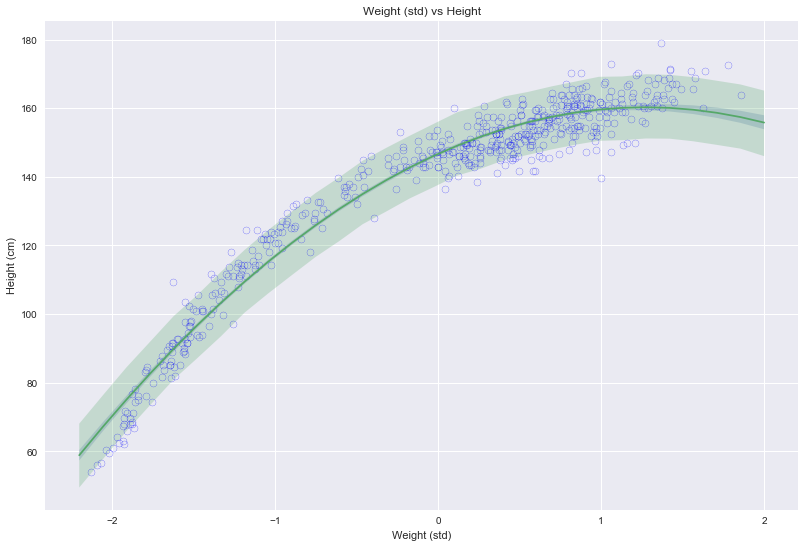

In [77]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight_s"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.25);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight (std) vs Height")
ax.set_xlabel("Weight (std)")
ax.set_ylabel("Height (cm)");

### 4.70

In [78]:
d["weight_s3"] = d["weight_s"]**3
with pm.Model() as m4_6:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b2 = pm.Normal("b3", mu=0, sd=10)
    b2 = pm.Normal("b2", mu=0, sd=10)
    b1 = pm.Normal("b1", mu=0, sd=10)
    a = pm.Normal("a", mu=178, sd=100)
    mu = a + b1*d["weight_s"] + b2*d["weight_s2"] + b2*d["weight_s3"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4_6 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b1, b2, b3, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:21<00:00, 1023.16draws/s]


### 4.71 - 4.72

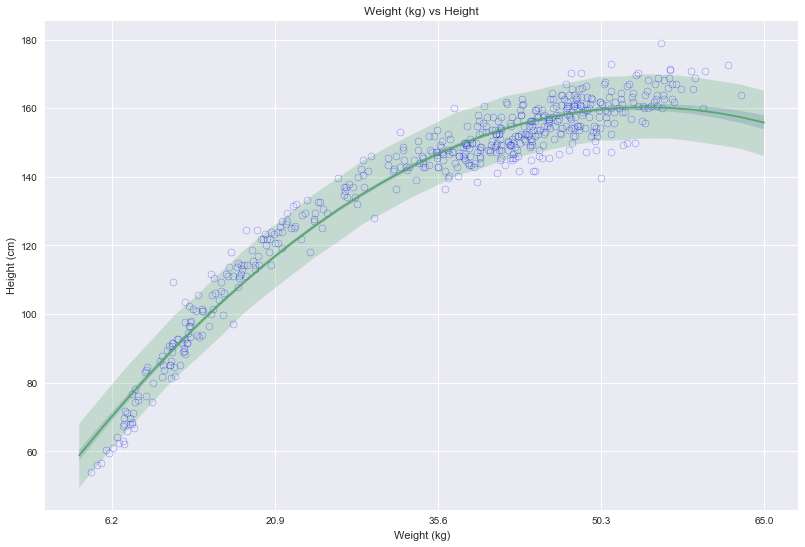

In [79]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight_s"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.25);
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25)
at = np.arange(-2, 3)
ax.set_xticks(at)
ax.set_xticklabels(np.round(at * d.weight.std() + d.weight.mean(), 1))
ax.set_title("Weight (kg) vs Height")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)");

## Practice

### Easy

#### 4E1.

$y_i \sim Normal(\mu, \sigma)$

#### 4E2.

There are 2 parameters in the posterior distribution, $\mu$ and $\sigma$

#### 4E3.

$P(\mu, \sigma | y_i) = \frac{P(y_i | \mu, \sigma)\times P(\mu, \sigma)}{\int P(y_i | d \mu, d \sigma)}$

#### 4E4.

$\mu_{i} = \alpha + \beta x_{i}$

#### 4E5.

There are 3 parameters in the posterior distribution, $\alpha$, $\beta$ and $\sigma$

### Medium

#### 4M1.

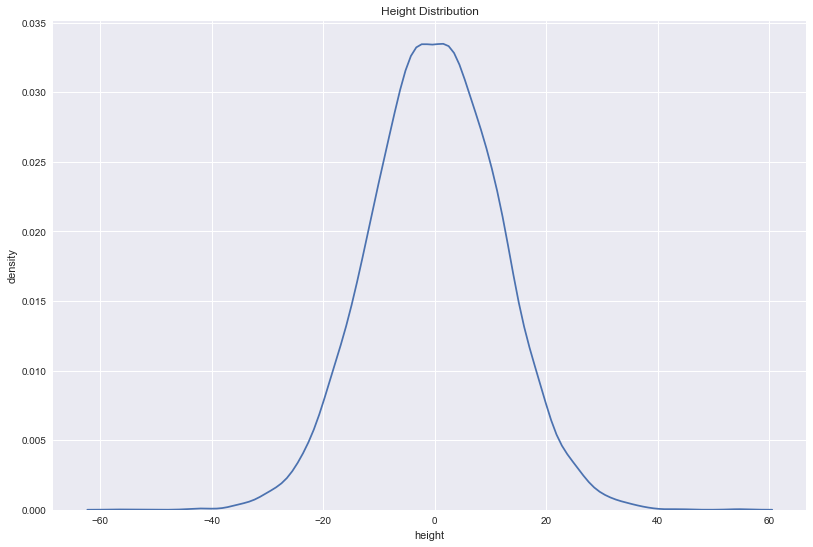

In [80]:
mu_list = stats.norm.rvs(loc=0, scale=10, size=int(1e4))
sigma_list = stats.uniform.rvs(loc=0, scale=10, size=int(1e4))
heights = stats.norm.rvs(loc=mu_list, scale=sigma_list)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.kdeplot(heights)
ax.set_title("Height Distribution")
ax.set_xlabel("height")
ax.set_ylabel("density");

#### 4M2.

In [81]:
with pm.Model() as m_4m2:
    sigma = pm.Uniform("sigma", lower=0, upper=10)
    mu = pm.Normal("mu", mu=0, sd=10)
    height = pm.Normal("height", mu=mu, sd=sigma)

#### 4M3.

$y_i \sim Normal(\mu, \sigma)$

$\mu = \alpha + \beta x_i$

$\alpha \sim Normal(0, 50)$

$\beta \sim Uniform(0, 10)$

$\sigma \sim Uniform(0, 50)$

#### 4M4.

$y_i \sim Normal(\mu, \sigma)$

$\mu = \alpha + \beta x_i$

$\alpha \sim Normal(150, 20)$

$\beta \sim Uniform(0, 10)$

$\sigma \sim Uniform(0, 50)$

#### 4M5.

$y_i \sim Normal(\mu, \sigma)$

$\mu = \alpha + \beta x_i$

$\alpha \sim Normal(120, 20)$

$\beta \sim Uniform(0, 10)$

$\sigma \sim Uniform(0, 50)$

#### 4M6.

$y_i \sim Normal(\mu, \sigma)$

$\mu = \alpha + \beta x_i$

$\alpha \sim Normal(120, 20)$

$\beta \sim Uniform(0, 10)$

$\sigma \sim Uniform(0, 64)$

### Hard

#### 4H1.

In [82]:
individuals = pd.DataFrame([[46.95],
                            [43.72],
                            [64.78],
                            [32.59],
                            [54.63]],
                           columns=["weight"],
                           index=pd.Series(range(1, 6), name="individual"))

In [83]:
num_samples = len(trace_4_3) * trace_4_3.nchains

mu = trace_4_3["a"].reshape(num_samples, 1) +\
     np.multiply(trace_4_3["b"].reshape(num_samples, 1), 
                 individuals["weight"].values)

sigma = (trace_4_3["sigma"]
         .repeat(len(individuals))
         .reshape(len(individuals), num_samples)
         .T)

sim_height = stats.norm.rvs(loc=mu, scale=sigma)
expected_height = np.mean(sim_height, axis=0)
interval_89 = pm.hpd(sim_height, alpha=0.11)

In [84]:
(individuals
 .assign(expected_height=expected_height)
 .assign(interval_89_lb=interval_89[:, 0])
 .assign(interval_89_ub=interval_89[:, 1]))

,weight,expected_height,interval_89_lb,interval_89_ub
individual,,,,
1,46.95,156.331254,148.295996,164.596696
2,43.72,153.458378,144.982547,161.334496
3,64.78,172.497910,163.930301,180.430746
4,32.59,143.369145,135.144155,151.454674
5,54.63,163.357963,155.161801,171.526917


#### 4H2.

In [85]:
d = (pd.read_csv('Data/Howell1.csv', sep=';', header=0)
     .loc[lambda df: df["age"] < 18])

print(len(d))
d.head()

192


,height,weight,age,male
18,121.92,19.617854,12.0,1
19,105.41,13.947954,8.0,0
20,86.36,10.489315,6.5,0
23,129.54,23.586784,13.0,1
24,109.22,15.989118,7.0,0


##### (a)

In [86]:
with pm.Model() as m_4h2:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=10)
    a = pm.Normal("a", mu=100, sd=30)
    mu = a + b*d["weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4h2 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:21<00:00, 1026.22draws/s]


In [87]:
pm.hpd(trace_4h2["b"], alpha=0.89)*10

array([27.02713938, 27.2151653 ])

For every 10 units increase in weight, the model predicts an increase of between 27.10 and 27.30 units in height

##### (b)

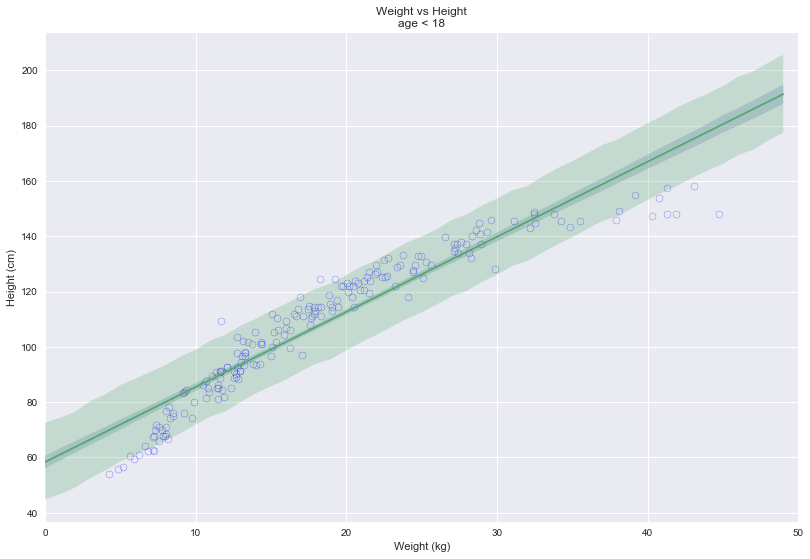

In [88]:
weight_seq = np.arange(0, 50)

num_samples = len(trace_4h2) * trace_4h2.nchains

mu = trace_4h2["a"].reshape(num_samples, 1) +\
     np.multiply(trace_4h2["b"].reshape(num_samples, 1), 
                 weight_seq)

sigma = (trace_4h2["sigma"]
         .repeat(len(weight_seq))
         .reshape(len(weight_seq), num_samples)
         .T)

mu_mean = mu.mean(axis=0)
mu_pi = pm.hpd(mu, alpha=.11)
sim_height = stats.norm.rvs(loc=mu, scale=sigma)
height_pi = pm.hpd(sim_height, alpha=0.11)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.25)
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Weight vs Height\nage < 18")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")
ax.set_xlim(0, 50);

##### (c)

1. The relationship between `weight` and `height` doesn't look linear
2. Age is definitely an important predictor of height between 0 and 18 years and should be included in the model

A better model could replace $\mu = \alpha + \beta w_i$ with $\mu = \alpha + \beta_1 w_i +\beta_2 a_i + \beta_2 a_i^2$ where `w` is weight and `a` is age. This takes into account that age is important and age and height are non linearly related for children.

#### 4H3.

In [89]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
print(len(d))
d.head()

544


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


##### (a)

In [90]:
d["log_weight"] = np.log(d["weight"])
with pm.Model() as m_4h3:
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    b = pm.Normal("b", mu=0, sd=100)
    a = pm.Normal("a", mu=178, sd=100)
    mu = a + b*d["log_weight"]
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d["height"])
    trace_4h3 = pm.sample(int(1e4), tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [a, b, sigma]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:38<00:00, 570.49draws/s]


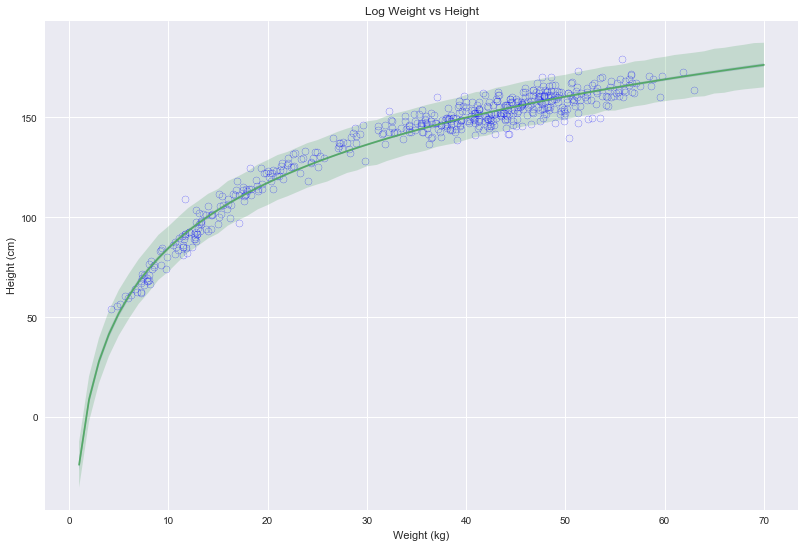

In [92]:
weight_seq = np.arange(0, 71)

num_samples = len(trace_4h3) * trace_4h3.nchains

mu = trace_4h3["a"].reshape(num_samples, 1) +\
     np.multiply(trace_4h3["b"].reshape(num_samples, 1), 
                 np.log(weight_seq))

sigma = (trace_4h3["sigma"]
         .repeat(len(weight_seq))
         .reshape(len(weight_seq), num_samples)
         .T)

mu_mean = mu.mean(axis=0)
mu_pi = pm.hpd(mu, alpha=0.03)
sim_height = stats.norm.rvs(loc=mu, scale=sigma)
height_pi = pm.hpd(sim_height, alpha=0.03)

f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
ax.plot(d["weight"], d["height"], "o", mew=0.2, mec="b", mfc="None")
ax.plot(weight_seq, mu_mean)
ax.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], alpha=0.25)
ax.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], alpha=0.25);
ax.set_title("Log Weight vs Height")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)");